In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cinemática Inversa (I.K.)

**Parámetros**

In [2]:
#Xp = int(input("Introduza el valor de Xp: "))
#Yp = int(input("Introduza el valor de Yp: "))
#Zp = int(input("Introduza el valor de Zp: "))
Xp = 297.972
Yp = 297.972
Zp = 328.341

# Largo del Eslabon 2 y Eslabon 3
a2 = 250
a3 = 232
b1 = 300

## **Hallamos Theta 1**

$$
\theta1 = \arctan(\frac{y_p}{x_p})
$$

In [3]:
theta1 = np.arctan(Yp/Xp)
print("Theta 1: ", theta1.round(5), "rads")

Theta 1:  0.7854 rads


## **Hallamos Theta 3**

$$
P_1x = \sqrt(x_p^2 + y_p^2) \\
P_1z = z_p \\
P = \sqrt(P_1x^2 + P_1z^2) \\
$$

In [4]:
P1_x = np.sqrt( (Xp**2) + (Yp**2) )
print("P1_X: ", P1_x.round(3))
P1_z = Zp - b1
print("P1_Z: %.3f" % P1_z)
P = np.sqrt( (P1_x**2) + (P1_z**2) )
print("Punto P: ", P.round(3))


P1_X:  421.396
P1_Z: 28.341
Punto P:  422.348


Despejando Theta 3 de nuestra ecuacion

Por ley de coseno: $ c^2 = a^2 + b^2 - 2 a b\cos( \alpha ) $

$$
P = a_2^2 + a_3^2 - 2a_2 a_3\cos( \alpha ) \\
\alpha = \pi + \theta3 \\
$$

Nos queda:

$$

P_1x^2 + P_1z^2 = a_2^2 + a_3^2 - 2a_2 a_3\cos( \pi + \theta3  ) \\

\cos(\pi + \theta3 ) = \frac{ P_1x^2 + P_1z^2 - a_2^2 - a_3^2  }{ - 2a_2 a_3 }

$$

Sabemos que:

$$

\cos(\pi + \theta3 ) = \cos(\pi )\cos(\theta3) + \sin(\pi)\sin(\theta3)  = -\cos(\theta3 )

$$

Despejando theta 3:

Forma 1: 
$$
\theta3 = \arccos( \frac{ P_1x^2 + P_1z^2 - a_2^2 - a_3^2  }{ 2a_2 a_3 } )
$$

Forma 2: 
$$
\sin(\theta3) + \cos(\theta3) = 1 \implies \sin(\theta3) =  \pm \sqrt(1 - \cos(\theta3)^2) \\
$$

Cambiando de variable:  $\cos(\theta3) = D $ 

$$
\sin(\theta3) =  \pm \sqrt(1 - D^2) \\
\tan(\theta3) = \frac{\sin(\theta3)}{\cos(\theta3)} \implies \frac{ \pm \sqrt(1 - D^2)}{D} \\
\theta3 = \arctan(\frac{ \pm \sqrt(1 - D^2)}{D})

$$

In [5]:
D = ( (P**2) - a2**2 - a3**2)/(2*a2*a3)

theta3_1 = np.arctan( np.sqrt(1-D**2)/D )
theta3_2 = np.arctan( -np.sqrt(1-D**2)/D )
#theta3_3 = np.arccos((P1_x**2 + P1_z**2 - a2**2 - a3**2)/(2*a2*a3) )

print("Theta 3_1: ", theta3_1.round(4), "rads  -> ", (theta3_1*180/np.pi).round(3), "°" )
print("Theta 3_2: ", theta3_2.round(4), "rads  -> ", (theta3_2*180/np.pi).round(3), "°" )
#print("Theta 3_3: ", theta3_3.round(4), "rads  -> ", (theta3_3*180/np.pi).round(3), "°" )



Theta 3_1:  1.0064 rads  ->  57.66 °
Theta 3_2:  -1.0064 rads  ->  -57.66 °


## **Hallamos Theta 2**

Por ley de coseno: $ c^2 = a^2 + b^2 - 2 a b\cos( \alpha ) $

$$

c = \sqrt(P_1x^2 + P_1z^2) \\
a_3^2 = a_2^2 + P_1x^2 + P_1z^2 - 2a_2\sqrt(P_1x^2 + P_1z^2)\cos(\alpha)\\
\cos(\alpha) = \frac{a_3^2 - a_2^2 - (P_1x^2 + P_1z^2)}{ - 2a_2\sqrt(P_1x^2 + P_1z^2) } \\

$$

Sabemos que $ \alpha = \theta2 - \psi \implies \theta2 = \alpha + \psi $

Hallando el angulo $\psi$

$$

\tan(\psi) = \frac{P_1z }{P_1x} \implies \psi = \arctan( \frac{P_1z }{P_1x} )

$$

Reemplazando $\psi$ en la ecuacion nos queda:

$$

\cos(\theta2 - \arctan( \frac{P_1z }{P_1x} ) ) = \frac{a_3^2 - a_2^2 - (P_1x^2 + P_1z^2)}{ - 2a_2\sqrt(P_1x^2 + P_1z^2) } \\
\cos(\theta2 - \arctan( \frac{P_1z }{P_1x} ) ) = \frac{P_1x^2 + P_1z^2 + a_2^2 - a_3^2}{ 2a_2\sqrt(P_1x^2 + P_1z^2) }
$$

Despejando $\theta2$:

$$

\theta_{2,1} = \arccos( \frac{P_1x^2 + P_1z^2 + a_2^2 - a_3^2}{ 2a_2\sqrt(P_1x^2 + P_1z^2) } ) + \arctan( \frac{P_1z}{P_1x} ) \\

\theta_{2,2} = -\arccos( \frac{P_1x^2 + P_1z^2 + a_2^2 - a_3^2}{ 2a_2\sqrt(P_1x^2 + P_1z^2) } ) + \arctan( \frac{P_1z}{P_1x} )

$$

In [6]:
theta2_1 = np.arccos( (P1_x**2 + P1_z**2 + a2**2 - a3**2)/(2*a2*np.sqrt( (P1_x**2) + (P1_z**2) ) ) ) + np.arctan(P1_z/P1_x)
theta2_2 = -np.arccos( (P1_x**2 + P1_z**2 + a2**2 - a3**2)/(2*a2*np.sqrt( (P1_x**2) + (P1_z**2) ) ) ) + np.arctan(P1_z/P1_x)

print("Theta 2_1: ", theta2_1.round(3) )
psi = np.arctan(P1_z/P1_x)

alfa = np.arccos( (P1_x**2 + P1_z**2 + a2**2 - a3**2)/(2*a2*np.sqrt( (P1_x**2) + (P1_z**2) ) ) )
print("alpha", alfa.round(3) )

print("Psi: ", psi.round(3), "rads")
print("Theta 2_2: ", theta2_2.round(3) )

Theta 2_1:  0.55
alpha 0.483
Psi:  0.067 rads
Theta 2_2:  -0.415


Conversion Radianes a Grados

In [7]:
tetha1Deg = (theta1*180)/np.pi

tetha2Deg = (theta2_1*180)/np.pi

tetha3Deg = (theta3_2*180)/np.pi

psiDeg = (psi*180)/np.pi

alphaDeg = (alfa*180)/np.pi


print("tetha 1: ", tetha1Deg.round(3), "°")
print("tetha 2: ", tetha2Deg.round(3), "°")
print("tetha 3: ", tetha3Deg.round(3), "°")
print("psi: ", psiDeg.round(3), "°")
print("alpha: ", alphaDeg.round(3), "°")


tetha 1:  45.0 °
tetha 2:  31.5 °
tetha 3:  -57.66 °
psi:  3.848 °
alpha:  27.652 °


Una vez calculamos los ángulos theta 1, theta 2 y theta 3; procedemos al método de Cinemática Directa

# Cinemática Directa (D.K.)

In [8]:
a1 = 0 #150 #50 -> ORIGINAL
a2 = 250
a3 = 232
# restar PZ = 328.341 - b1
b1 = 300
b2 = 0
b3 = 0

alpha1 = 90 #0
alpha2 = 0
alpha3 = 0

Conversion Grados a Radianes

In [9]:
tetha1R = (tetha1Deg*np.pi)/180
alpha1R = (alpha1*np.pi)/180

tetha2R = (tetha2Deg*np.pi)/180
alpha2R = (alpha2*np.pi)/180

tetha3R = (tetha3Deg*np.pi)/180
alpha3R = (alpha3*np.pi)/180

print("tetha 1: {} rads\nalpha 1: {} rads".format(tetha1R.round(3), alpha1R) )
print("\ntetha 2: {} rads\nalpha 2: {} rads".format(tetha2R.round(3), alpha2R) )
print("\ntetha 3: {} rads\nalpha 3: {} rads".format(tetha3R.round(4), alpha3R) )


tetha 1: 0.785 rads
alpha 1: 1.5707963267948966 rads

tetha 2: 0.55 rads
alpha 2: 0.0 rads

tetha 3: -1.0064 rads
alpha 3: 0.0 rads


Matrices de Transformacion Homegenea

In [10]:
# Parametros b ( desplazamiento en el eje Z )

Tb1 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b1],
      [0, 0, 0, 1]]

Tb2 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b2],
      [0, 0, 0, 1]]

Tb3 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b3],
      [0, 0, 0, 1]]

In [11]:
# Parametros Tetha ( Rotacion en el eje Z )

Ttetha1 = [[np.cos(tetha1R), -np.sin(tetha1R), 0, 0],
          [np.sin(tetha1R), np.cos(tetha1R), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]

Ttetha2 = [[np.cos(tetha2R), -np.sin(tetha2R), 0, 0],
          [np.sin(tetha2R), np.cos(tetha2R), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]
Ttetha3 = [[np.cos(tetha3R), -np.sin(tetha3R), 0, 0],
          [np.sin(tetha3R), np.cos(tetha3R), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]

print("Ttetha1:\n", np.matrix(Ttetha1).round(3) )
print("\nTtetha2:\n", np.matrix(Ttetha2).round(3) )
print("\nTtetha3:\n", np.matrix(Ttetha3).round(3) )

Ttetha1:
 [[ 0.707 -0.707  0.     0.   ]
 [ 0.707  0.707  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]

Ttetha2:
 [[ 0.853 -0.522  0.     0.   ]
 [ 0.522  0.853  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]

Ttetha3:
 [[ 0.535  0.845  0.     0.   ]
 [-0.845  0.535  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


In [12]:
# Parametros a ( desplazamiento del eslabon en el eje X  )

Ta1 = [[1, 0, 0, a1],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

Ta2 = [[1, 0, 0, a2],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

Ta3 = [[1, 0, 0, a3],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

In [13]:
Talpha1 = [[1, 0, 0, 0],
         [0, np.cos(alpha1R), -np.sin(alpha1R), 0],
          [0, np.sin(alpha1R), np.cos(alpha1R), 0],
          [0, 0, 0, 1]]

Talpha2 = [[1, 0, 0, 0],
         [0, np.cos(alpha2R), -np.sin(alpha2R), 0],
          [0, np.sin(alpha2R), np.cos(alpha2R), 0],
          [0, 0, 0, 1]]

Talpha3 = [[1, 0, 0, 0],
         [0, np.cos(alpha3R), -np.sin(alpha3R), 0],
          [0, np.sin(alpha3R), np.cos(alpha3R), 0],
          [0, 0, 0, 1]]

print("Talpha1:\n", np.matrix(Talpha1) )
print("\nTalpha2:\n", np.matrix(Talpha2) )
print("\nTalpha3:\n", np.matrix(Talpha3).round(3) )

Talpha1:
 [[ 1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  0.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]

Talpha2:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Talpha3:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [14]:
#T1_1 = np.dot(Tb1, Ttetha1)
#T1_2 = np.dot(T1_1, Ta1)
#T1_a_0 = np.dot(T1_2, Talpha1)

T1_a_0 = np.dot(np.dot(np.dot(Tb1, Ttetha1), Ta1), Talpha1)

print("\nMatriz de Transformacion T1 -> 0 (TL1): (a1 = {} mm, b1 = {}, tetha1 = {}°, alpha1 = {}°)\n\n" .format(a1, b1, tetha1Deg.round(3), alpha1R), np.matrix(T1_a_0).round(3) )


Matriz de Transformacion T1 -> 0 (TL1): (a1 = 0 mm, b1 = 300, tetha1 = 45.0°, alpha1 = 1.5707963267948966°)

 [[  0.707  -0.      0.707   0.   ]
 [  0.707   0.     -0.707   0.   ]
 [  0.      1.      0.    300.   ]
 [  0.      0.      0.      1.   ]]


In [15]:
#T2_1 = np.dot(Tb2, Ttetha2)
#T2_2 = np.dot(T2_1, Ta2)

T2_a_1 = np.dot(np.dot(np.dot(Tb2, Ttetha2), Ta2), Talpha2)

print("\nMatriz de Transformacion T2 -> 1 (TL2): (a2 = {} mm, b2 = {}, tetha2 = {}°, alpha2 = {}°)\n\n".format(a2, b2, tetha2Deg.round(3), alpha2R), np.matrix(T2_a_1).round(3) )


Matriz de Transformacion T2 -> 1 (TL2): (a2 = 250 mm, b2 = 0, tetha2 = 31.5°, alpha2 = 0.0°)

 [[  0.853  -0.522   0.    213.16 ]
 [  0.522   0.853   0.    130.624]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


In [16]:
#T3_1 = np.dot(Tb3, Ttetha3)
#T3_2 = np.dot(T3_1, Ta3)

T3_a_2 = np.dot(np.dot(np.dot(Tb3, Ttetha3), Ta3), Talpha3)

print("\nMatriz de Transformacion T3 -> 2 (TL3): (a3 = {} mm, b3 = {}, tetha3 = {}°, alpha3 = {}°)\n\n".format(a3, b3, tetha3Deg.round(3), alpha3R), np.matrix(T3_a_2).round(3)  )


Matriz de Transformacion T3 -> 2 (TL3): (a3 = 232 mm, b3 = 0, tetha3 = -57.66°, alpha3 = 0.0°)

 [[   0.535    0.845    0.     124.108]
 [  -0.845    0.535    0.    -196.013]
 [   0.       0.       1.       0.   ]
 [   0.       0.       0.       1.   ]]


In [17]:
T10_21 = np.dot(T1_a_0, T2_a_1)
Tfinal = np.dot(np.dot(T1_a_0, T2_a_1), T3_a_2) 

print("\nMatriz de Transformacion TF (0 -> 3):\n\n", np.matrix(Tfinal).round(3) )


Matriz de Transformacion TF (0 -> 3):

 [[ 6.35000e-01  3.12000e-01  7.07000e-01  2.97972e+02]
 [ 6.35000e-01  3.12000e-01 -7.07000e-01  2.97972e+02]
 [-4.41000e-01  8.98000e-01  0.00000e+00  3.28341e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]


Matriz DH

In [18]:
print("\nMatriz de Transformacion Final (P3):\n", Tfinal.round(3))

P2 = np.dot(T1_a_0, T2_a_1)
print("\nMatriz de Transformacion Parcial (P2):\n", P2.round(3))

P2_1 = np.dot(Tfinal,  np.linalg.inv(T3_a_2) )
print("\nMatriz de Transformacion Parcial (P2):\n", P2_1.round(3))

P1 = np.dot( P2, np.linalg.inv(T2_a_1) )
print("\nMatriz de Transformacion Parcial 1 (P1):\n", P1.round(3))



Matriz de Transformacion Final (P3):
 [[ 6.35000e-01  3.12000e-01  7.07000e-01  2.97972e+02]
 [ 6.35000e-01  3.12000e-01 -7.07000e-01  2.97972e+02]
 [-4.41000e-01  8.98000e-01  0.00000e+00  3.28341e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]

Matriz de Transformacion Parcial (P2):
 [[ 6.03000e-01 -3.69000e-01  7.07000e-01  1.50727e+02]
 [ 6.03000e-01 -3.69000e-01 -7.07000e-01  1.50727e+02]
 [ 5.22000e-01  8.53000e-01  0.00000e+00  4.30624e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]

Matriz de Transformacion Parcial (P2):
 [[ 6.03000e-01 -3.69000e-01  7.07000e-01  1.50727e+02]
 [ 6.03000e-01 -3.69000e-01 -7.07000e-01  1.50727e+02]
 [ 5.22000e-01  8.53000e-01  0.00000e+00  4.30624e+02]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]

Matriz de Transformacion Parcial 1 (P1):
 [[  0.707   0.      0.707  -0.   ]
 [  0.707   0.     -0.707  -0.   ]
 [  0.      1.      0.    300.   ]
 [  0.      0.      0.      1.   ]]


In [19]:
print("======== P3 ========")
xJ3 = Tfinal[0,3]
yJ3 = Tfinal[1,3]
zJ3 = Tfinal[2,3]
print("xJ3:", xJ3.round(3))
print("yJ3:", yJ3.round(3))
print("zJ3:", zJ3.round(3))

print("======== P2 ========")
xJ2 = P2[0,3]
yJ2 = P2[1,3]
zJ2 = P2[2,3]
print("\nxJ2:", xJ2.round(3))
print("yJ2:", yJ2.round(3))
print("zJ2:", zJ2.round(3))

print("======== P1 ========")
xJ1 = P1[0,3]
yJ1 = P1[1,3]
zJ1 = P1[2,3]
print("\nxJ1:", xJ1.round(3))
print("yJ1:", yJ1.round(3))
print("zJ1:", zJ1.round(3))

======== P3 ========
xJ3: 297.972
yJ3: 297.972
zJ3: 328.341
======== P2 ========

xJ2: 150.727
yJ2: 150.727
zJ2: 430.624
======== P1 ========

xJ1: -0.0
yJ1: -0.0
zJ1: 300.0


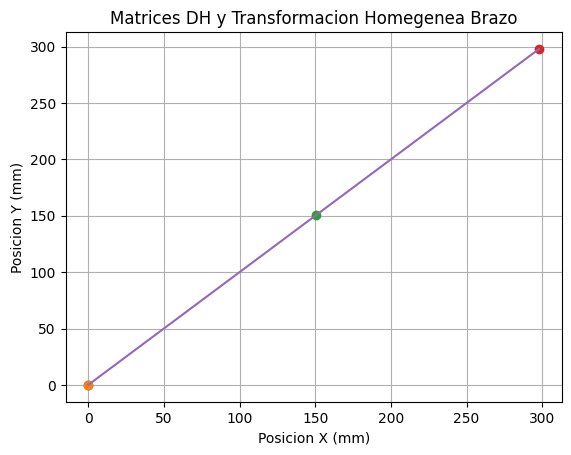

In [20]:
fix, axes = plt.subplots()
plt.plot(xJ1, 0, 'o')
plt.plot(xJ1, yJ1, 'o')
plt.plot(xJ2, yJ2, 'o')
plt.plot(xJ3, yJ3, 'o')
plt.plot([xJ1, xJ1, xJ2, xJ3], [0, yJ1, yJ2, yJ3])
plt.title("Matrices DH y Transformacion Homegenea Brazo")
plt.xlabel("Posicion X (mm)")
plt.ylabel("Posicion Y (mm)")
plt.grid()
plt.show()

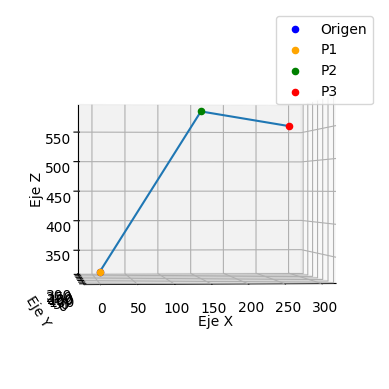

In [21]:

figura = plt.figure()
grafica = figura.add_subplot(111, projection='3d')
grafica.scatter(xJ1, 0, Zp, c='blue', marker='o', label = 'Origen')
grafica.scatter(xJ1, yJ1, Zp+a1, c='orange', marker='o', label = 'P1')
grafica.scatter(xJ2, yJ2, Zp+a2, c='green', marker='o', label = 'P2')
grafica.scatter(xJ3, yJ3, Zp+a3, c='red', marker='o', label = 'P3')


X = np.array([xJ1, xJ1, xJ2, xJ3])
Y = np.array([0, yJ1, yJ2, yJ3])
Z = np.array([Zp, Zp+a1, Zp+a2, Zp+a3])


#grafica.plot(X,Z)
grafica.plot(X, Y, Z)
grafica.set_xlabel('Eje X')
grafica.set_ylabel('Eje Y')
grafica.set_zlabel('Eje Z')
grafica.legend()
#grafica.view_init(50, 250)
grafica.view_init(0, -95) # PLANO XZ
#grafica.view_init(80, 265) #2D VIEW PLANO XY
plt.show()

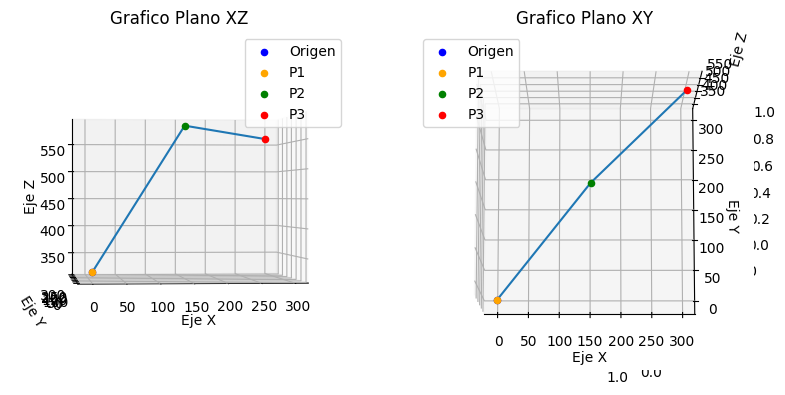

In [22]:
fig = plt.figure(figsize=plt.figaspect(0.5))
grafica = fig.add_subplot(1, 2, 1, projection='3d')
grafica.scatter(xJ1, 0, Zp, c='blue', marker='o', label = 'Origen')
grafica.scatter(xJ1, yJ1, Zp+a1, c='orange', marker='o', label = 'P1')
grafica.scatter(xJ2, yJ2, Zp+a2, c='green', marker='o', label = 'P2')
grafica.scatter(xJ3, yJ3, Zp+a3, c='red', marker='o', label = 'P3')

X = np.array([xJ1, xJ1, xJ2, xJ3])
Y = np.array([0, yJ1, yJ2, yJ3])
Z = np.array([Zp, Zp+a1, Zp+a2, Zp+a3])

# =============== GRAFICO PLANO XZ ===============

#grafica.plot(X,Z)
grafica.plot(X, Y, Z)
grafica.set_xlabel('Eje X')
grafica.set_ylabel('Eje Y')
grafica.set_zlabel('Eje Z')
grafica.legend()
plt.title('Grafico Plano XZ')
#grafica.view_init(50, 250)
grafica.view_init(0, -95) # PLANO XZ
#grafica.view_init(80, 265) #2D VIEW PLANO XY




# =============== GRAFICO PLANO XY ===============

ax = fig.add_subplot(1, 2, 2, projection='3d')

grafica = fig.add_subplot(1, 2, 2, projection='3d')
grafica.scatter(xJ1, 0, Zp, c='blue', marker='o', label = 'Origen')
grafica.scatter(xJ1, yJ1, Zp+a1, c='orange', marker='o', label = 'P1')
grafica.scatter(xJ2, yJ2, Zp+a2, c='green', marker='o', label = 'P2')
grafica.scatter(xJ3, yJ3, Zp+a3, c='red', marker='o', label = 'P3')

X = np.array([xJ1, xJ1, xJ2, xJ3])
Y = np.array([0, yJ1, yJ2, yJ3])
Z = np.array([Zp, Zp+a1, Zp+a2, Zp+a3])
grafica.plot(X, Y, Z)
grafica.set_xlabel('Eje X')
grafica.set_ylabel('Eje Y')
grafica.set_zlabel('Eje Z')
grafica.legend()
plt.title('Grafico Plano XY')
#grafica.view_init(50, 250)
#grafica.view_init(0, -95) # PLANO XZ
grafica.view_init(80, 270) # PLANO XY

plt.show()